In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
accident = pd.read_csv('accident.csv')
person = pd.read_csv('person.csv')
vindecode = pd.read_csv('vindecode.csv')

In [152]:
accident.head()

,STATE,ST_CASE,PERMVIT,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,...,LATITUDE,LONGITUD,SP_JUR,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,DRUNK_DR
0,1,10001,1,127,0,1,1,2015,5,2,...,33.878653,-87.325328,0,99,99,2,58,88,88,1
1,1,10002,1,83,0,1,1,2015,5,22,...,34.910442,-86.908708,0,99,99,22,20,88,88,0
2,1,10003,2,11,0,1,1,2015,5,1,...,32.142006,-85.758456,0,99,99,1,45,99,99,1
3,1,10004,1,45,0,4,1,2015,1,0,...,31.439814,-85.510300,0,99,99,1,15,88,88,1
4,1,10005,2,45,2050,7,1,2015,4,7,...,31.319331,-85.515100,0,99,99,7,16,88,88,0


In [153]:
count = accident[['ST_CASE','STATE']].groupby(['STATE']).agg(['count'])

Text(0,0.5,u'count')

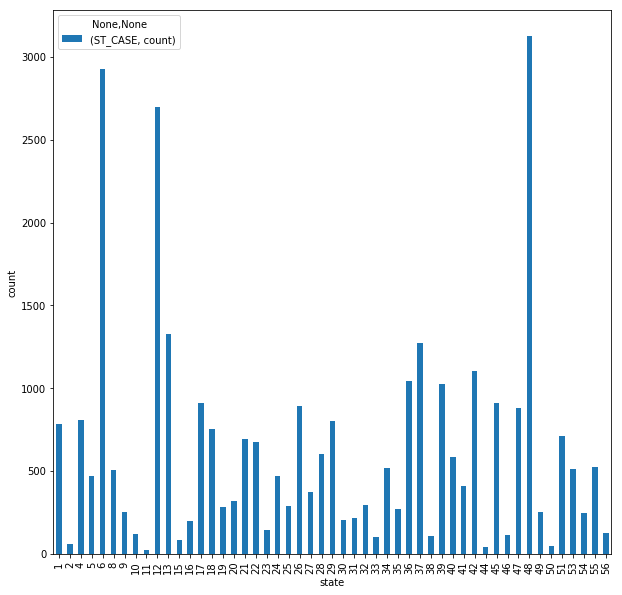

In [170]:
#Question 1 - Visualize the count of accidents by 'STATE' wise
count.plot(kind='bar',figsize=(10,10))
plt.xlabel('state')
plt.ylabel('count')



In [155]:
accident.columns

Index([u'STATE', u'ST_CASE', u'PERMVIT', u'COUNTY', u'CITY', u'DAY', u'MONTH',
       u'YEAR', u'DAY_WEEK', u'HOUR', u'MINUTE', u'ROUTE', u'TWAY_ID',
       u'TWAY_ID2', u'MILEPT', u'LATITUDE', u'LONGITUD', u'SP_JUR',
       u'NOT_HOUR', u'NOT_MIN', u'ARR_HOUR', u'ARR_MIN', u'HOSP_HR',
       u'HOSP_MN', u'DRUNK_DR'],
      dtype='object')

In [156]:
acc_subset= accident[['STATE', 'ST_CASE']]
acc_subset.head()

,STATE,ST_CASE
0,1,10001
1,1,10002
2,1,10003
3,1,10004
4,1,10005


In [157]:
person.head()

,ST_CASE,COUNTY,AGE,SEX,PER_TYP,INJ_SEV,SEAT_POS,DEATH_DA,DEATH_MO,DEATH_YR,DEATH_HR,DEATH_MN,DEATH_TM,RACE,LOCATION
0,10001,127,68,1,1,4,11,1,1,2015,2,40,240,1,0
1,10002,83,49,1,1,4,11,1,1,2015,22,13,2213,1,0
2,10003,11,31,1,1,4,11,1,1,2015,1,25,125,2,0
3,10003,11,20,2,2,2,13,88,88,8888,88,88,8888,0,0
4,10004,45,40,1,1,4,11,4,1,2015,0,57,57,1,0


In [158]:
#person data has different year.
# I have merged person and accident. only
new_person =person.merge(acc_subset, on=('ST_CASE'))


In [159]:
new_person.DEATH_YR.value_counts()

8888    45495
2015    34759
9999      259
2016       74
Name: DEATH_YR, dtype: int64

In [160]:
#My assumption here 
#NO explanation given for 9999 and I am not counting it for the analysis
#Any number less than 8888 is consdired to be a valid year
new_person_dead = new_person[new_person.DEATH_YR < 8888]

In [161]:
new_person_dead.DEATH_YR.value_counts()

2015    34759
2016       74
Name: DEATH_YR, dtype: int64

In [162]:
new_person_dead.count()

ST_CASE     34833
COUNTY      34833
AGE         34833
SEX         34833
PER_TYP     34833
INJ_SEV     34833
SEAT_POS    34833
DEATH_DA    34833
DEATH_MO    34833
DEATH_YR    34833
DEATH_HR    34833
DEATH_MN    34833
DEATH_TM    34833
RACE        34833
LOCATION    34833
STATE       34833
dtype: int64

In [187]:
# Question 2 - Find top five states with highest number of  persons died  
count1 = new_person_dead[['ST_CASE','STATE']].groupby(['STATE']).agg({'ST_CASE':['count']})
top5= count1.sort_values([("ST_CASE",'count')], ascending=False).head(5)
print top5

      ST_CASE
        count
STATE        
48       3515
6        3137
12       2937
13       1430
37       1255


In [164]:
new_person_alive = new_person[new_person.DEATH_YR == 8888]

In [202]:
count_alive = new_person_alive[['ST_CASE','STATE']].groupby(['STATE']).agg({'ST_CASE':['count']})

In [203]:
count_all = new_person[['ST_CASE','STATE']].groupby(['STATE']).agg({'ST_CASE':['count']})

In [204]:
print count_alive.head(5)
print count_all.head(5)

      ST_CASE
        count
STATE        
1        1031
2          93
4        1271
5         600
6        4446
      ST_CASE
        count
STATE        
1        1880
2         158
4        2164
5        1131
6        7622


In [205]:
count_all.head()


,ST_CASE
,count
STATE,
1,1880
2,158
4,2164
5,1131
6,7622


In [206]:
count_alive.head()

,ST_CASE
,count
STATE,
1,1031
2,93
4,1271
5,600
6,4446


In [257]:
count_alive.columns[0]
temp1 =count_alive.add_suffix('_C').reset_index()
temp1.columns
temp1.ST_CASE_C
temp2 =count_all.add_suffix('_C').reset_index()
temp2.columns
#print temp1.ST_CASE_C/temp2.ST_CASE_C
#print temp1.STATE

MultiIndex(levels=[[u'ST_CASE_C', u'STATE'], [u'count_C', u'']],
           labels=[[1, 0], [1, 0]])

In [258]:
# Question 3 -Find top five states with highest survival rate (Total persons survived in a state/Total number of accidents in a state) 
question3= temp1.merge(temp2,on=temp1.STATE)

In [259]:
#question3.reset_index(inplace=True)  
question3['survived'] = question3.ST_CASE_C_x / question3.ST_CASE_C_y*100

In [260]:
q3 = question3[['STATE_x','survived']]
q3= q3.sort_values('survived', ascending=False).head(5)
#Find top five states with highest survival rate (Total persons survived in a state/Total number of accidents in a state) 

q3.set_index('STATE_x')

,survived
,
STATE_x,
11,63.492063
49,60.851064
32,59.577114
53,59.166068
44,59.090909


In [177]:
question4.columns

Index([u'ST_CASE', u'COUNTY_x', u'AGE', u'SEX', u'PER_TYP', u'INJ_SEV',
       u'SEAT_POS', u'DEATH_DA', u'DEATH_MO', u'DEATH_YR', u'DEATH_HR',
       u'DEATH_MN', u'DEATH_TM', u'RACE', u'LOCATION', u'STATE', u'PERMVIT',
       u'COUNTY_y', u'CITY', u'DAY', u'MONTH', u'YEAR', u'DAY_WEEK', u'HOUR',
       u'MINUTE', u'ROUTE', u'TWAY_ID', u'TWAY_ID2', u'MILEPT', u'LATITUDE',
       u'LONGITUD', u'SP_JUR', u'NOT_HOUR', u'NOT_MIN', u'ARR_HOUR',
       u'ARR_MIN', u'HOSP_HR', u'HOSP_MN', u'DRUNK_DR'],
      dtype='object')

In [178]:
count_all = question4[['ST_CASE','MONTH']].groupby(['MONTH']).agg({'MONTH':['count']})

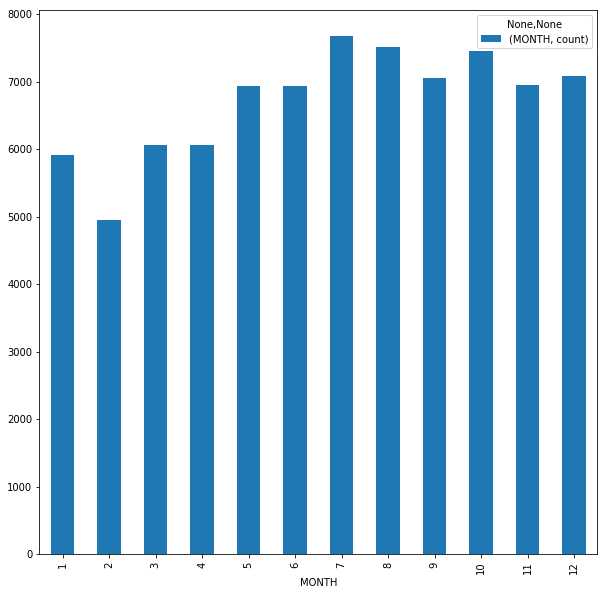

In [179]:
# Question 4-  Visualize the distribution of total persons involved in an accident in the 'STATE' = 36  month wise in 2015  
count_all.plot(kind='bar',figsize=(10,10))

In [180]:
question5 = question4.merge(vindecode, on=('ST_CASE'))
question5.columns

Index([u'ST_CASE', u'COUNTY_x', u'AGE', u'SEX', u'PER_TYP', u'INJ_SEV',
       u'SEAT_POS', u'DEATH_DA', u'DEATH_MO', u'DEATH_YR', u'DEATH_HR',
       u'DEATH_MN', u'DEATH_TM', u'RACE', u'LOCATION', u'STATE', u'PERMVIT',
       u'COUNTY_y', u'CITY', u'DAY', u'MONTH', u'YEAR', u'DAY_WEEK', u'HOUR',
       u'MINUTE', u'ROUTE', u'TWAY_ID', u'TWAY_ID2', u'MILEPT', u'LATITUDE',
       u'LONGITUD', u'SP_JUR', u'NOT_HOUR', u'NOT_MIN', u'ARR_HOUR',
       u'ARR_MIN', u'HOSP_HR', u'HOSP_MN', u'DRUNK_DR', u'VEH_NO', u'NCICMAKE',
       u'VINYEAR', u'VEHTYPE', u'VEHTYPE_T', u'VINMAKE_T', u'VINMODEL_T',
       u'VINTRIM_T', u'VINTRIM1_T', u'VINTRIM2_T', u'VINTRIM3_T',
       u'VINTRIM4_T', u'BODYSTYL', u'BODYSTYL_T'],
      dtype='object')

In [181]:
question5_subset = question5[(question5.STATE == 36) & (question5.VINMAKE_T == 'FORD') & (question5.DEATH_YR == 8888)]

In [182]:
#Question 5 -Find the count of persons survived in an accident occurred in  'STATE' = 36 where the vehicle make is ‘FORD’ month wise in year 2015
question5_subset.count()[0]


295